# Analysing YouTube's Trending Videos' Data

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import CSV

In [30]:
trending_videos = pd.read_csv('train.csv')

## View the data


In [31]:
# first few entries of data
trending_videos.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,NaN,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102,NaN,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302,NaN,NaN
4,TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374,NaN,NaN


In [32]:
trending_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3198 non-null   object 
 1   category_id            3192 non-null   object 
 2   channel_title          3195 non-null   object 
 3   subscriber             3175 non-null   float64
 4   title                  3195 non-null   object 
 5   tags                   3046 non-null   object 
 6   description            3133 non-null   object 
 7   Trend_day_count        3197 non-null   float64
 8   Tag_count              3197 non-null   object 
 9   Trend_tag_count        3197 non-null   object 
 10  comment_count          3198 non-null   object 
 11  comment_disabled       3198 non-null   object 
 12  like dislike disabled  3198 non-null   object 
 13  likes                  3198 non-null   object 
 14  dislike                3198 non-null   object 
 15  tag 

## Cleanup Data

In [33]:
trending_videos['Tag_count'] = pd.to_numeric(trending_videos['Tag_count'], errors = "coerce")
trending_videos['Trend_tag_count'] = pd.to_numeric(trending_videos['Trend_tag_count'], errors = "coerce")
trending_videos['views'] = pd.to_numeric(trending_videos['views'], errors = "coerce")
trending_videos['likes'] = pd.to_numeric(trending_videos['likes'], errors = "coerce")
trending_videos['dislike'] = pd.to_numeric(trending_videos['dislike'], errors = "coerce")
trending_videos['comment_count'] = pd.to_numeric(trending_videos['comment_count'], errors = "coerce")

In [34]:
trending_videos['Tag_count'] = trending_videos['Tag_count'].fillna(trending_videos['Tag_count'].mean())
trending_videos['Trend_day_count'] = trending_videos['Trend_day_count'].fillna(trending_videos['Trend_day_count'].mean())
trending_videos['Trend_tag_count'] = trending_videos['Trend_tag_count'].fillna(trending_videos['Trend_tag_count'].mean())
trending_videos['views'] = trending_videos['views'].fillna(trending_videos['views'].mean())
trending_videos['likes'] = trending_videos['likes'].fillna(trending_videos['likes'].mean())
trending_videos['dislike'] = trending_videos['dislike'].fillna(trending_videos['dislike'].mean())
trending_videos['comment_count'] = trending_videos['comment_count'].fillna(trending_videos['comment_count'].mean())

In [35]:
trending_videos = trending_videos.drop(['Unnamed: 17', 'Unnamed: 18'], axis=1)

## Analyzation

In [43]:
print("Average Views of trending videos: ",trending_videos['views'].mean())
print("Average Trending days: ", trending_videos['Trend_day_count'].mean())
print("Highest views on a trending video: ", trending_videos['views'].max())
print("Lowest views on a trending video: ", trending_videos['views'].min())

Average Views of trending videos:  1572121.2442915232
Average Trending days:  7.964341570222084
Highest views on a trending video:  989873537.0
Lowest views on a trending video:  1.0


#### Video trending maximum days

In [44]:
trending_videos[trending_videos['Trend_day_count'] == trending_videos['Trend_day_count'].max()]

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
1952,KBC90MVa41,25,CBS This Morning,298962.0,"Senate passes historic GOP tax bill, House to ...",video|cbs|news|Senate|tax reform|House|Republi...,The Senate approved a historic tax reform bill...,4444.0,13.0,7.0,126241.0,TRUE,FALSE,13482.0,8034.0,False,450132.0


## Visualization

#### Trending Tag Count vs Views

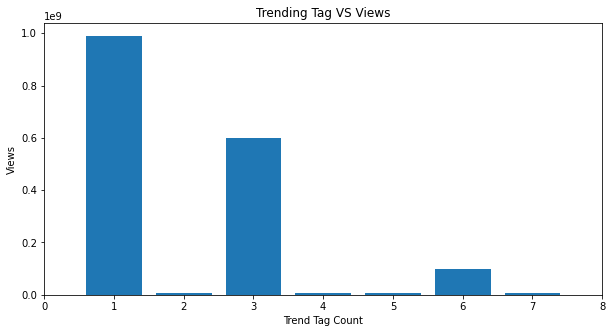

In [171]:
fig ,ax = plt.subplots(figsize = (10,5))
plt.ylabel('Views')
plt.xlabel('Trend Tag Count')
plt.title('Trending Tag VS Views')
plt.xlim([0, 8])
ax.bar(trending_videos['Trend_tag_count'], trending_videos['views']);

#### Tag Count vs Views

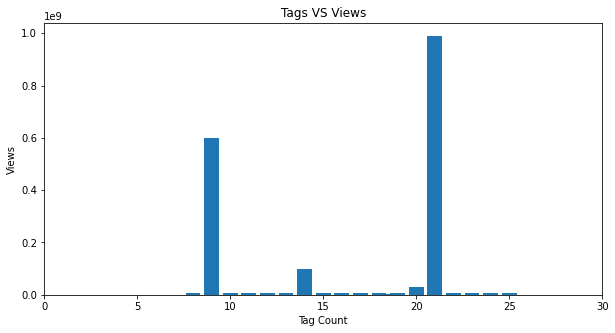

In [20]:
fig ,ax = plt.subplots(figsize = (10,5))
plt.ylabel('Views')
plt.xlabel('Tag Count')
plt.title('Tags VS Views')
plt.xlim([0, 30])
ax.bar(trending_videos['Tag_count'], trending_videos['views']);

#### Views vs Number of Dislikes

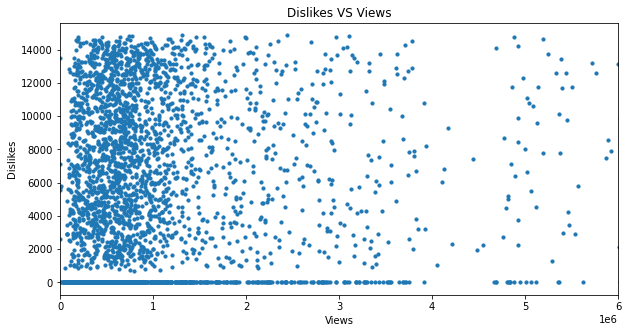

In [172]:
fig ,ax = plt.subplots(figsize = (10,5))
plt.xlabel('Views')
plt.ylabel('Dislikes')
plt.title('Dislikes VS Views')
plt.xlim([0, 6000000])
ax.scatter(trending_videos['views'], trending_videos['dislike'], s=10);

#### Trending Days Count vs Trending Tags Count

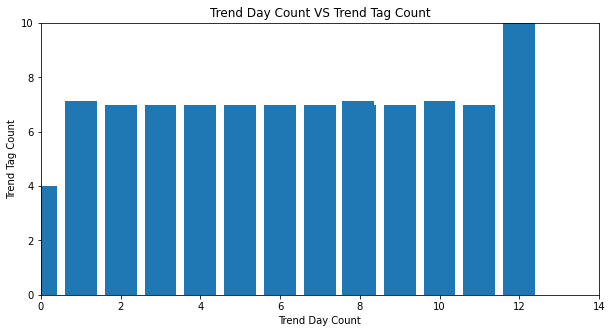

In [186]:
fig ,ax = plt.subplots(figsize = (10,5))
plt.xlabel('Trend Day Count')
plt.ylabel('Trend Tag Count')
plt.title('Trend Day Count VS Trend Tag Count')
plt.xlim([0,14])
plt.ylim([0,10])
ax.bar(trending_videos['Trend_day_count'], trending_videos['Trend_tag_count']);

#### Subscriber Count vs Trending Days Count

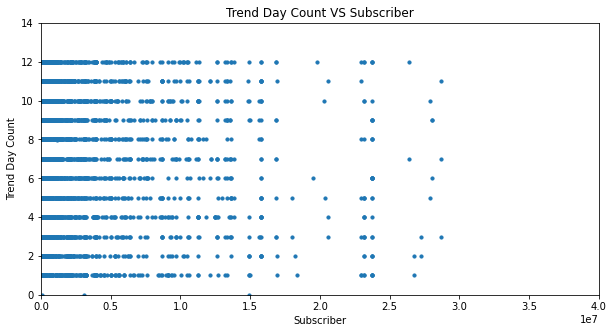

In [204]:
fig ,ax = plt.subplots(figsize = (10,5))
plt.xlabel('Subscriber')
plt.ylabel('Trend Day Count')
plt.title('Trend Day Count VS Subscriber')
plt.xlim([0,40000000])
plt.ylim([0,14])
ax.scatter(trending_videos['subscriber'], trending_videos['Trend_day_count'], s=10);